
# Plotting tools in nilearn

Nilearn comes with a set of plotting functions for easy visualization of
Nifti-like images such as statistical maps mapped onto anatomical images
or onto glass brain representation, anatomical images, functional/EPI images,
region specific mask images.

See `plotting` for more details.


## Retrieve data from nilearn provided (general-purpose) datasets



In [1]:
from nilearn import datasets, image, plotting

# abide dataset to have EPI images and masks
dataset = datasets.fetch_abide_pcp(data_dir="data", derivatives="func_mean", SUB_ID=[50003, 50031])

/home/kendra/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "



Dataset created in data/ABIDE_pcp



 ...done. (0 seconds, 0 min)
/home/kendra/.local/lib/python3.8/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


In [2]:
dataset.keys()

dict_keys(['description', 'phenotypic', 'func_mean'])

# Plotting statistical maps - mean activity
Here, we're plotting very simple statistical maps: the mean resting state activity for indivisual participants

## Your task: try to make the colorbars the same so we can compare them visually

Hint: look at the documentation: [https://nilearn.github.io/dev/modules/generated/nilearn.plotting.plot_stat_map.html](https://nilearn.github.io/dev/modules/generated/nilearn.plotting.plot_stat_map.html)

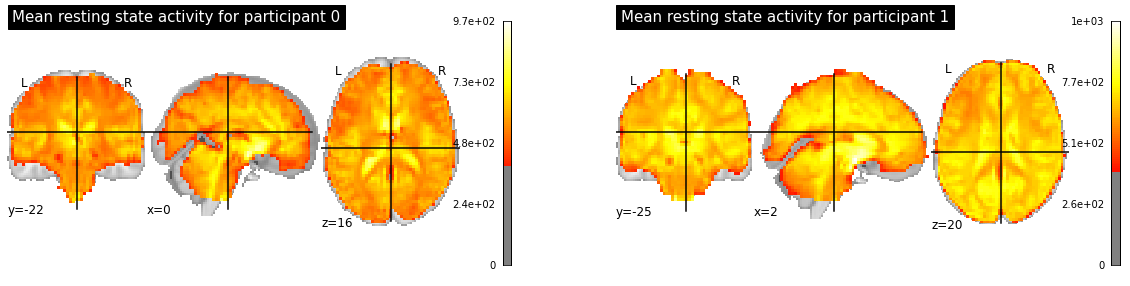

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2,figsize=(20,5))
for i_subplot, mean_func_img in enumerate(dataset.func_mean):
    plotting.plot_stat_map(
        mean_func_img, threshold=400, axes=axs[i_subplot], title=f"Mean resting state activity for participant {i_subplot}"
    )
plotting.show()

# Calculating the difference
We can use `image.math_img()` to perform math on the images. 
Here, we calculate and visualize the difference between the two maps that we previously viewed.

## Your task: threshold the map's extreme values
Figure out how to threthold the extreme values (there are many around the edges of the brain).
Maybe you could try it with `image.math_img()` or see if there are options in the plotting function to do this.

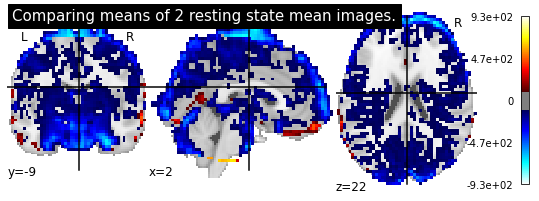

In [4]:
result_img = image.math_img(
    "img1 - img2",
    img1=dataset.func_mean[0],
    img2=dataset.func_mean[1],
)

plotting.plot_stat_map(
    result_img, threshold=100, title="Comparing means of 2 resting state mean images."
)
plotting.show()

## Making interactive visualizations with function `view_img`
An alternative to :func:`nilearn.plotting.plot_stat_map` is to use
:func:`nilearn.plotting.view_img` that gives more interactive
visualizations in a web browser. See `interactive-stat-map-plotting`
for more details.




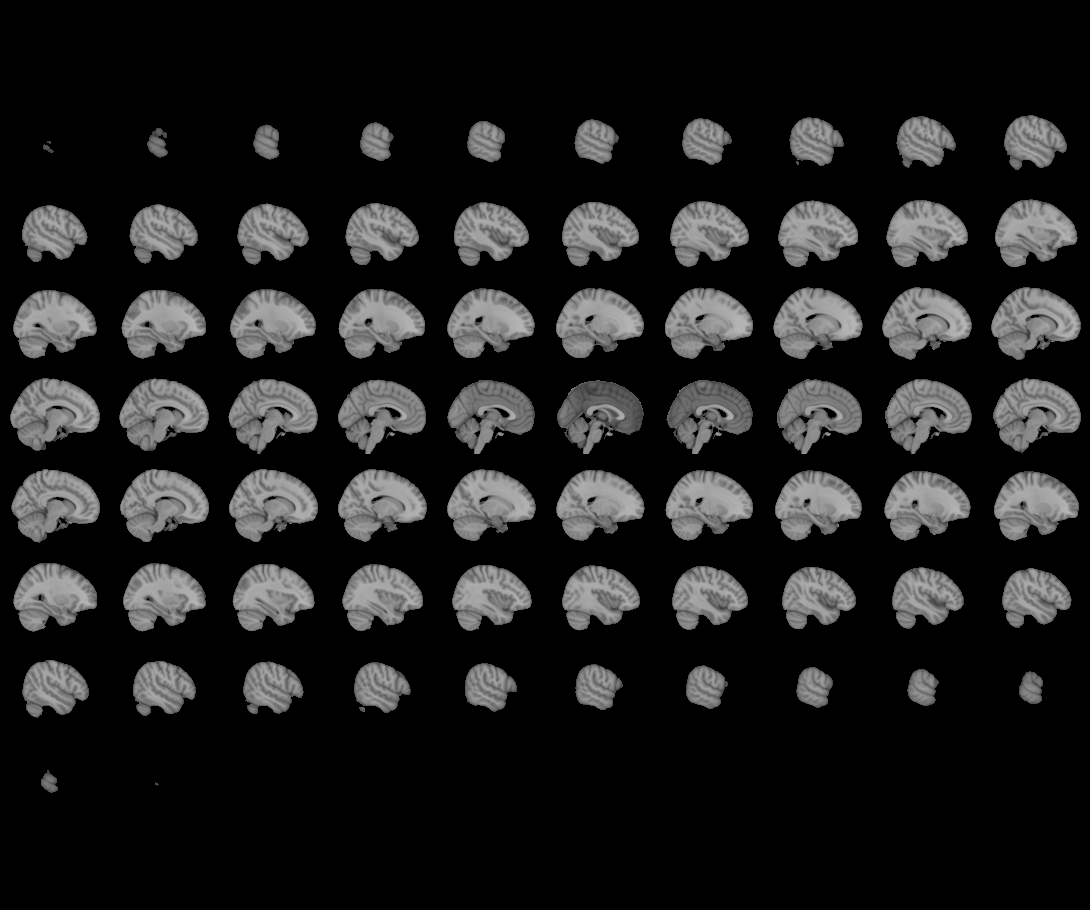
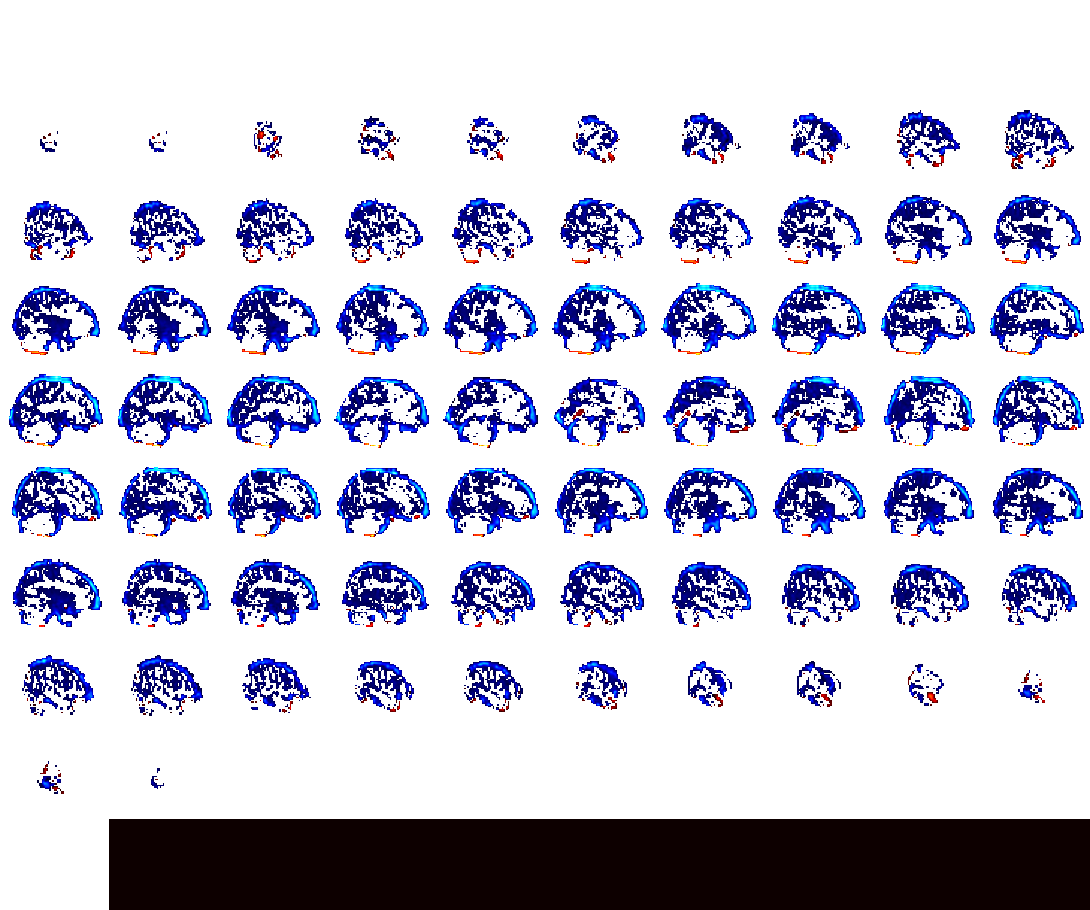

In [5]:
view = plotting.view_img(result_img, threshold=100)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

In [6]:
# uncomment this to open the plot in a web browser:
# view.open_in_browser()

## Plotting statistical maps in a glass brain with function `plot_glass_brain`

Now, the difference image is mapped on glass brain representation where glass
brain is always a fixed background template



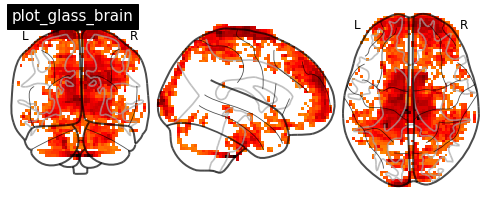

In [7]:
plotting.plot_glass_brain(result_img, title='plot_glass_brain',
                          threshold=400)